In [80]:
import numpy as np
import json
from pathlib import Path
import sys
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

sys.path.append('../src')
#sys.path.append('.')

In [94]:
results = json.load(Path('../dump/results.json').open('r'))

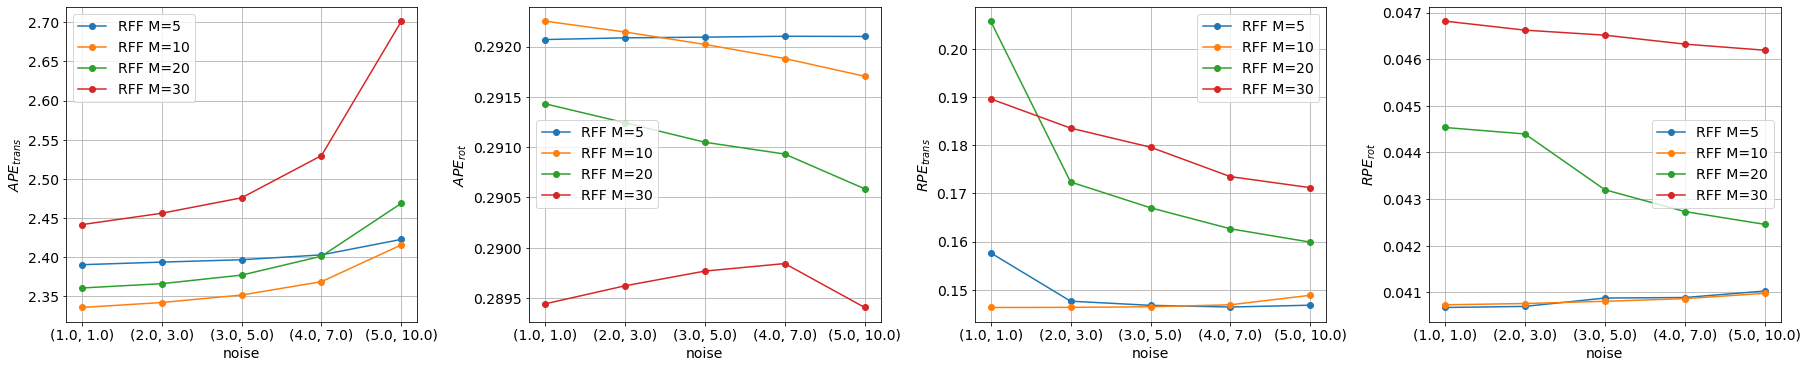

In [103]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

figs = []
for obs in ['range']: #, 'bearing', 'range-bearing']:
    fig, axs = plt.subplots(ncols=4, figsize=(25, 5), constrained_layout = True)
    for m, m_name, ax in zip(['ape_trans', 'ape_rot', 'rpe_trans', 'rpe_rot'], [r'$APE_{trans}$', r'$APE_{rot}$', r'$RPE_{trans}$', r'$RPE_{rot}$'], axs.flat):
        for n_land in [5, 10, 20, 30]:
            n_land = str(n_land)
            noises = results[obs][n_land].keys()
            means = np.zeros(5)
            for i in range(3):
                vals = [results[obs][n_land][k][i][m] for k in noises]
                means += np.array(vals) / 3.
            ax.plot(np.arange(5), means[::-1], '-o', label=f'RFF M={n_land}')
            ax.set_ylabel(f'{m_name}')
            ax.set_xlabel(f'noise')
            ax.set_xticks(np.arange(len(noises)))
            ax.set_xticklabels(list(noises))
            ax.legend()
            ax.grid(True)
    plt.show()
    plt.savefig(f'../figs/{obs}_result.pdf')
    figs.append(fig)
    plt.close()

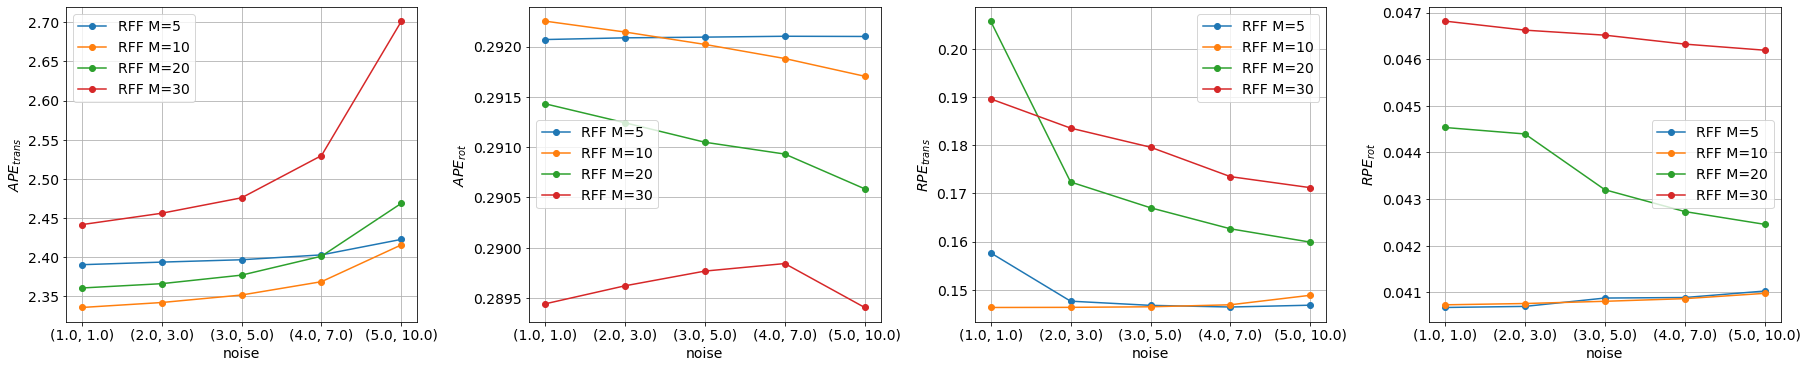

In [100]:
figs[0]